# Author: Aditya Yadav

# Notebook 5: Support Vector Machine (SVM) for Smoking Prediction

In this notebook, we'll implement and evaluate Support Vector Machine (SVM) models for predicting smoking status based on health indicators. We'll use the cleaned datasets prepared in Notebook 1.

## Understanding Support Vector Machines

Support Vector Machines are powerful supervised learning algorithms that can be used for both classification and regression tasks. SVMs work by finding the hyperplane that best separates the classes in the feature space with the maximum margin.

### How SVMs Work:
1. SVMs find the hyperplane (decision boundary) that maximizes the margin between classes
2. The "support vectors" are the data points closest to the hyperplane that influence its position and orientation
3. For non-linearly separable data, SVMs use a "kernel trick" to transform the feature space into a higher dimension where the data becomes separable
4. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid

### Advantages of SVMs:
- Effective in high-dimensional spaces (even when features > samples)
- Memory efficient as only a subset of training points (support vectors) are used
- Versatile due to different kernel functions for various decision boundaries
- Robust against overfitting, especially in high-dimensional space

### Limitations of SVMs:
- Performance drops if classes have significant overlap
- Requires careful parameter tuning for optimal performance
- Computationally intensive for large datasets
- Highly sensitive to feature scaling
- Less probabilistic interpretation than some other methods

In this notebook, we'll use the default SVM implementation from scikit-learn with an RBF kernel, which works well for many classification problems. We'll apply proper scaling to ensure the model performs optimally.

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For SVM model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set random seed for reproducibility
RANDOM_STATE = 42

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the full and reduced datasets
df_full = pd.read_csv('smoking_cleaned_full.csv')
df_reduced = pd.read_csv('smoking_cleaned_reduced.csv')

# Display basic information about the datasets
print(f"Full dataset shape: {df_full.shape}")
print(f"Reduced dataset shape: {df_reduced.shape}")

# Verify that both datasets have the target variable
print(f"\nTarget variable 'smoking' distribution in full dataset:\n{df_full['smoking'].value_counts()}")
print(f"\nTarget variable 'smoking' distribution in reduced dataset:\n{df_reduced['smoking'].value_counts()}")

Full dataset shape: (44084, 30)
Reduced dataset shape: (44084, 16)

Target variable 'smoking' distribution in full dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64

Target variable 'smoking' distribution in reduced dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64


## 2. Data Preparation for SVM

SVMs are highly sensitive to feature scaling because they calculate distances between data points. Without proper scaling, features with larger scales will dominate the distance calculations. Therefore, feature scaling is crucial for SVM performance.

We'll use MinMaxScaler to scale our features to a range of [0, 1], which is suitable for SVM models.

In [3]:
# Separate features and target for both datasets
X_full = df_full.drop('smoking', axis=1)
y_full = df_full['smoking']

X_reduced = df_reduced.drop('smoking', axis=1)
y_reduced = df_reduced['smoking']

# Split the data into training and testing sets
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=RANDOM_STATE, stratify=y_full
)

X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=RANDOM_STATE, stratify=y_reduced
)

# Apply feature scaling (MinMaxScaler)
scaler_full = MinMaxScaler()
X_full_train_scaled = scaler_full.fit_transform(X_full_train)
X_full_test_scaled = scaler_full.transform(X_full_test)

scaler_reduced = MinMaxScaler()
X_reduced_train_scaled = scaler_reduced.fit_transform(X_reduced_train)
X_reduced_test_scaled = scaler_reduced.transform(X_reduced_test)

print("Data preparation for SVM completed successfully.")
print(f"Training set size: {X_full_train.shape[0]} samples")
print(f"Testing set size: {X_full_test.shape[0]} samples")
print(f"Full feature set: {X_full.shape[1]} features")
print(f"Reduced feature set: {X_reduced.shape[1]} features")

Data preparation for SVM completed successfully.
Training set size: 35267 samples
Testing set size: 8817 samples
Full feature set: 29 features
Reduced feature set: 15 features


## 3. Training SVM Models

We'll train SVM models with default parameters for both the full and reduced feature sets. The default kernel in scikit-learn's SVC is the Radial Basis Function (RBF) kernel, which generally works well for many classification problems.

In [4]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_prob=None):
    """Calculate and return performance metrics for a classification model."""
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # ROC AUC (if probability predictions are available)
    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Train SVM model for full feature set
print("Training SVM model with full feature set...")
svm_full = SVC(probability=True, random_state=RANDOM_STATE)
svm_full.fit(X_full_train_scaled, y_full_train)

# Train SVM model for reduced feature set
print("Training SVM model with reduced feature set...")
svm_reduced = SVC(probability=True, random_state=RANDOM_STATE)
svm_reduced.fit(X_reduced_train_scaled, y_reduced_train)

# Make predictions
y_full_pred = svm_full.predict(X_full_test_scaled)
y_reduced_pred = svm_reduced.predict(X_reduced_test_scaled)

# Get probability predictions
y_full_prob = svm_full.predict_proba(X_full_test_scaled)[:, 1]
y_reduced_prob = svm_reduced.predict_proba(X_reduced_test_scaled)[:, 1]

# Evaluate performance
full_metrics = evaluate_model(y_full_test, y_full_pred, y_full_prob)
reduced_metrics = evaluate_model(y_reduced_test, y_reduced_pred, y_reduced_prob)

# Display results
print("\nSVM Model with Full Feature Set:")
print(f"Accuracy: {full_metrics['accuracy']:.4f}")
print(f"Precision: {full_metrics['precision']:.4f}")
print(f"Recall: {full_metrics['recall']:.4f}")
print(f"F1 Score: {full_metrics['f1_score']:.4f}")
print(f"ROC AUC: {full_metrics['roc_auc']:.4f}")

print("\nSVM Model with Reduced Feature Set:")
print(f"Accuracy: {reduced_metrics['accuracy']:.4f}")
print(f"Precision: {reduced_metrics['precision']:.4f}")
print(f"Recall: {reduced_metrics['recall']:.4f}")
print(f"F1 Score: {reduced_metrics['f1_score']:.4f}")
print(f"ROC AUC: {reduced_metrics['roc_auc']:.4f}")

Training SVM model with full feature set...
Training SVM model with reduced feature set...

SVM Model with Full Feature Set:
Accuracy: 0.7380
Precision: 0.6185
Recall: 0.7387
F1 Score: 0.6733
ROC AUC: 0.8171

SVM Model with Reduced Feature Set:
Accuracy: 0.7435
Precision: 0.6242
Recall: 0.7489
F1 Score: 0.6809
ROC AUC: 0.8150


## 4. Understanding the Evaluation Metrics

Let's understand what each metric means in the context of our smoking prediction problem:

1. **Accuracy**: The proportion of correct predictions (both smokers and non-smokers correctly identified) out of all predictions. While intuitive, accuracy can be misleading in imbalanced datasets like ours (63% non-smokers vs. 37% smokers).

2. **Precision**: The proportion of true positive predictions (correctly identified smokers) among all positive predictions. In our context: "When the SVM model predicts someone is a smoker, how often is it right?" High precision means fewer false positives (non-smokers incorrectly classified as smokers).

3. **Recall (Sensitivity)**: The proportion of true positive predictions (correctly identified smokers) among all actual smokers. In our context: "Of all actual smokers, how many did the SVM model correctly identify?" High recall means fewer false negatives (smokers incorrectly classified as non-smokers).

4. **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns. This is particularly useful in our case with moderate class imbalance, as it gives equal importance to both precision and recall.

5. **ROC AUC**: Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between smokers and non-smokers across all possible classification thresholds. Values range from 0.5 (no discriminative power, equivalent to random guessing) to 1.0 (perfect discrimination).

The choice of which metric to prioritize depends on the specific application:
- For applications where false positives are costly (e.g., unnecessary medical interventions), precision should be prioritized.
- For public health screening where missing smokers is more concerning, recall would be more important.
- In balanced scenarios, F1 score and ROC AUC provide good overall assessments of model performance.

## 5. Visualizing Model Performance

Confusion Matrix for Full Feature Set:


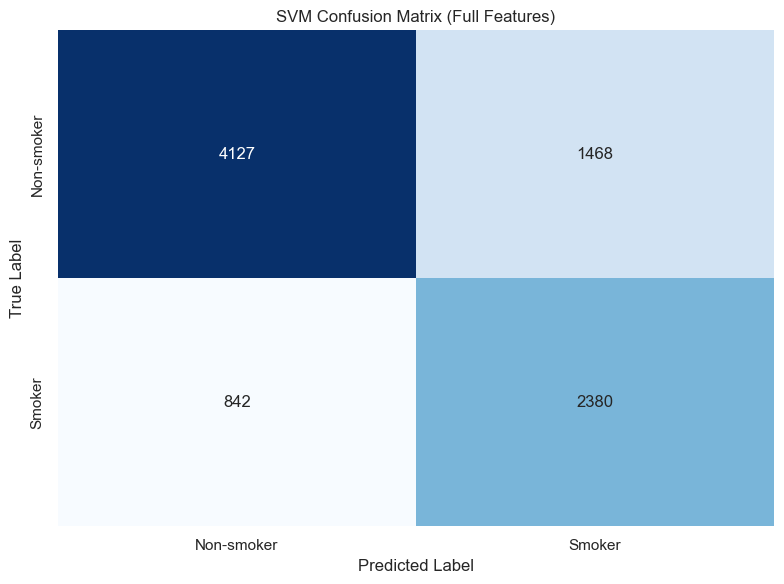

Specificity (True Negative Rate): 0.7376
Negative Predictive Value: 0.8305

Confusion Matrix for Reduced Feature Set:


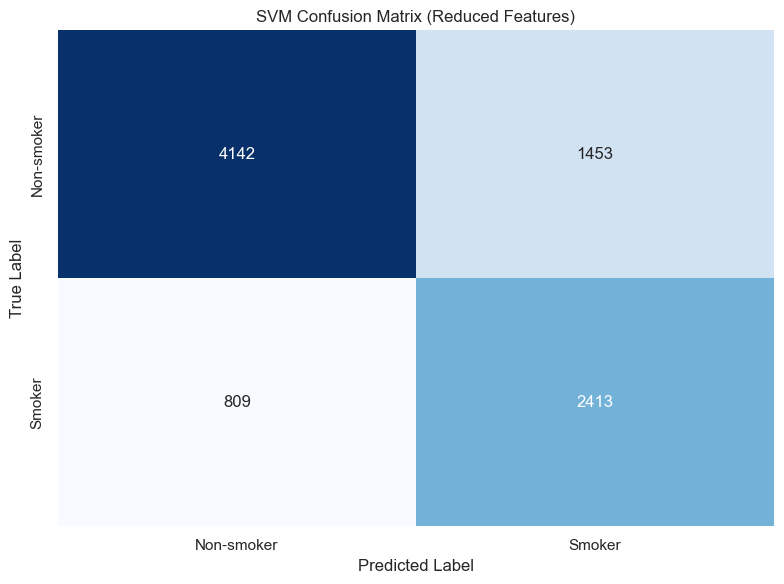

Specificity (True Negative Rate): 0.7403
Negative Predictive Value: 0.8366


In [5]:
# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Non-smoker', 'Smoker'],
               yticklabels=['Non-smoker', 'Smoker'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display derived metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # True negative rate
    npv = tn / (tn + fn)  # Negative predictive value
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")

# Function to plot ROC curves
def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Display confusion matrices
print("Confusion Matrix for Full Feature Set:")
plot_confusion_matrix(y_full_test, y_full_pred, 'SVM Confusion Matrix (Full Features)')

print("\nConfusion Matrix for Reduced Feature Set:")
plot_confusion_matrix(y_reduced_test, y_reduced_pred, 'SVM Confusion Matrix (Reduced Features)')

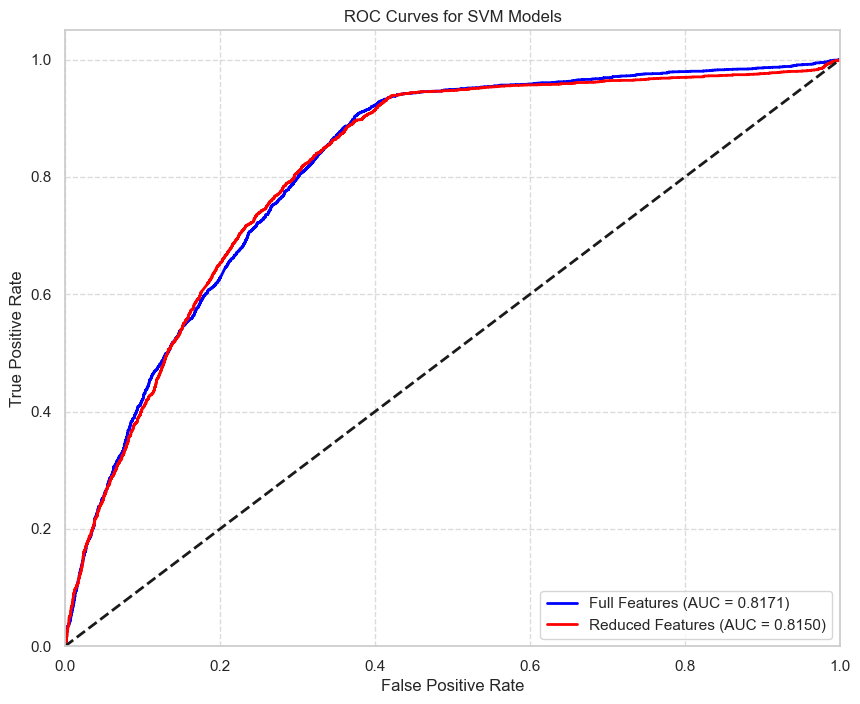

In [6]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for the full feature model
fpr_full, tpr_full, roc_auc_full = plot_roc_curve(y_full_test, y_full_prob, 'Full')
plt.plot(fpr_full, tpr_full, label=f'Full Features (AUC = {roc_auc_full:.4f})', lw=2, color='blue')

# Plot ROC curve for the reduced feature model
fpr_reduced, tpr_reduced, roc_auc_reduced = plot_roc_curve(y_reduced_test, y_reduced_prob, 'Reduced')
plt.plot(fpr_reduced, tpr_reduced, label=f'Reduced Features (AUC = {roc_auc_reduced:.4f})', lw=2, color='red')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Models')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 6. Comparison of Feature Sets

Let's directly compare the performance of our full and reduced feature sets to see how much predictive power we retain with fewer features:

In [7]:
# Create a comparison DataFrame
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Full Features': [
        full_metrics['accuracy'],
        full_metrics['precision'],
        full_metrics['recall'],
        full_metrics['f1_score'],
        full_metrics['roc_auc']
    ],
    'Reduced Features': [
        reduced_metrics['accuracy'],
        reduced_metrics['precision'],
        reduced_metrics['recall'],
        reduced_metrics['f1_score'],
        reduced_metrics['roc_auc']
    ]
})

# Calculate differences and percentage changes
metrics_comparison['Absolute Difference'] = metrics_comparison['Full Features'] - metrics_comparison['Reduced Features']
metrics_comparison['Percentage Change (%)'] = (metrics_comparison['Absolute Difference'] / metrics_comparison['Full Features']) * 100

# Display the comparison
print("Comparison of SVM Performance: Full vs. Reduced Feature Sets")
metrics_comparison.set_index('Metric')

Comparison of SVM Performance: Full vs. Reduced Feature Sets


,Full Features,Reduced Features,Absolute Difference,Percentage Change (%)
Metric,,,,
Accuracy,0.738006,0.743450,-0.005444,-0.737667
Precision,0.618503,0.624159,-0.005656,-0.914501
Recall,0.738672,0.748914,-0.010242,-1.386555
F1 Score,0.673267,0.680869,-0.007602,-1.129083
ROC AUC,0.817134,0.814965,0.002169,0.265462


<Figure size 1200x800 with 0 Axes>

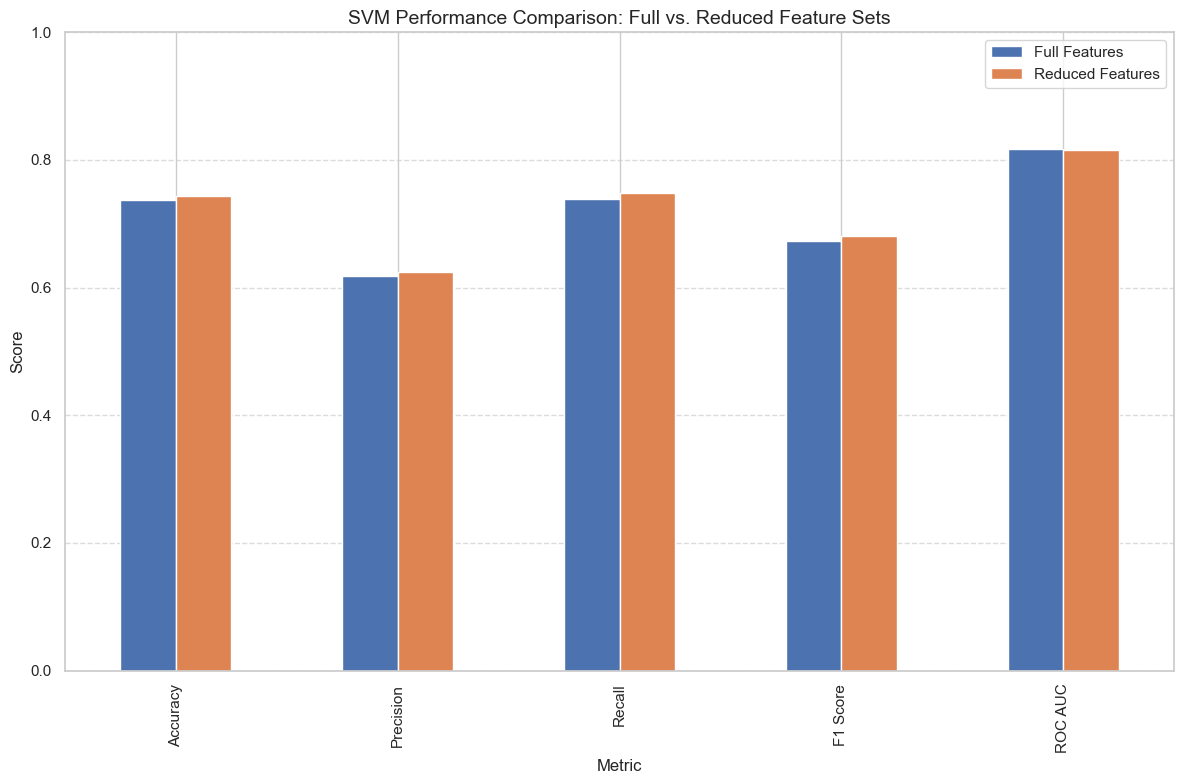

In [8]:
# Visualize the comparison
plt.figure(figsize=(12, 8))
metrics_comparison.set_index('Metric').loc[:, ['Full Features', 'Reduced Features']].plot(kind='bar')
plt.title('SVM Performance Comparison: Full vs. Reduced Feature Sets', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## 7. Save Results for Comparison with Other Models

Let's save our SVM model performance metrics to CSV files for later comparison with other models:

In [9]:
# Create DataFrames for saving results
svm_full_results = pd.DataFrame({
    'Model': ['SVM'],
    'Feature_Set': ['Full'],
    'Accuracy': [full_metrics['accuracy']],
    'Precision': [full_metrics['precision']],
    'Recall': [full_metrics['recall']],
    'F1_Score': [full_metrics['f1_score']],
    'ROC_AUC': [full_metrics['roc_auc']]
})

svm_reduced_results = pd.DataFrame({
    'Model': ['SVM'],
    'Feature_Set': ['Reduced'],
    'Accuracy': [reduced_metrics['accuracy']],
    'Precision': [reduced_metrics['precision']],
    'Recall': [reduced_metrics['recall']],
    'F1_Score': [reduced_metrics['f1_score']],
    'ROC_AUC': [reduced_metrics['roc_auc']]
})

# Combine results
svm_results = pd.concat([svm_full_results, svm_reduced_results], ignore_index=True)

# Add hyperparameter information
svm_results['Hyperparameters'] = ["Default RBF kernel", "Default RBF kernel"]

# Save results to CSV
svm_results.to_csv('svm_model_results.csv', index=False)
print("Saved SVM model results to svm_model_results.csv")

# Display the final results table
svm_results

Saved SVM model results to svm_model_results.csv


,Model,Feature_Set,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Hyperparameters
0,SVM,Full,0.738006,0.618503,0.738672,0.673267,0.817134,Default RBF kernel
1,SVM,Reduced,0.743450,0.624159,0.748914,0.680869,0.814965,Default RBF kernel
